# Machine Learning (Mini Project) :-
## Weight Prediction :

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\admin\\Documents\\My Tableau Repository\\Datasources\\Height_Weight.csv")
df

,id,gender,weight,height
0,29,F,39,157
1,182,F,43,154
2,130,F,44,157
3,104,F,45,163
4,128,F,45,157
...,...,...,...,...
194,65,M,97,189
195,30,M,101,183
196,54,M,102,185
197,97,M,103,185


In [3]:
df.drop(['id'],axis=1,inplace=True)
df

,gender,weight,height
0,F,39,157
1,F,43,154
2,F,44,157
3,F,45,163
4,F,45,157
...,...,...,...
194,M,97,189
195,M,101,183
196,M,102,185
197,M,103,185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  199 non-null    object
 1   weight  199 non-null    int64 
 2   height  199 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ KB


In [5]:
df.describe()

,weight,height
count,199.000000,199.000000
mean,65.195980,170.587940
std,13.008031,8.948848
min,39.000000,148.000000
25%,55.000000,164.000000
50%,63.000000,170.000000
75%,73.500000,177.500000
max,103.000000,197.000000


In [6]:
df.describe(include='object')

,gender
count,199
unique,2
top,F
freq,111


In [7]:
df.isnull().sum()

gender    0
weight    0
height    0
dtype: int64

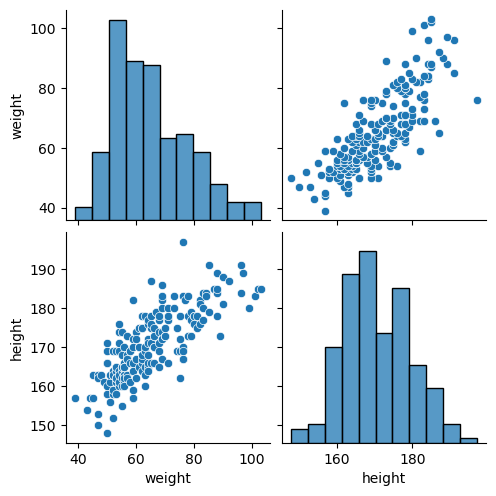

In [8]:
sb.pairplot(df)

<AxesSubplot:xlabel='height', ylabel='weight'>

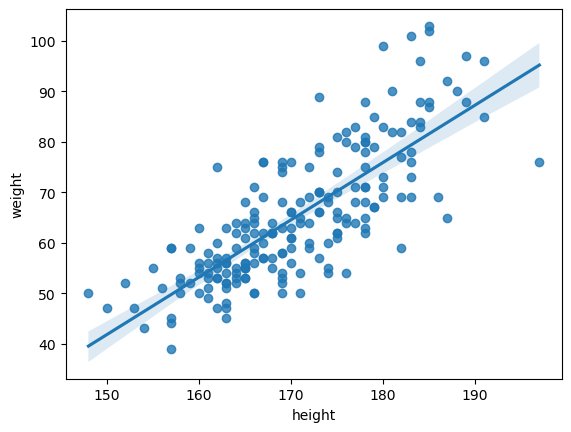

In [9]:
sb.regplot(x=df['height'],y=df['weight'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='height'>

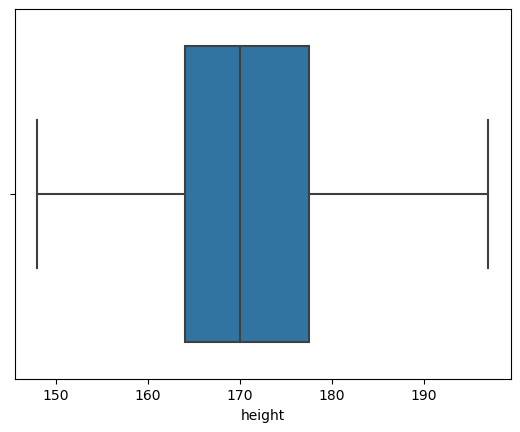

In [10]:
sb.boxplot(df['height'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weight'>

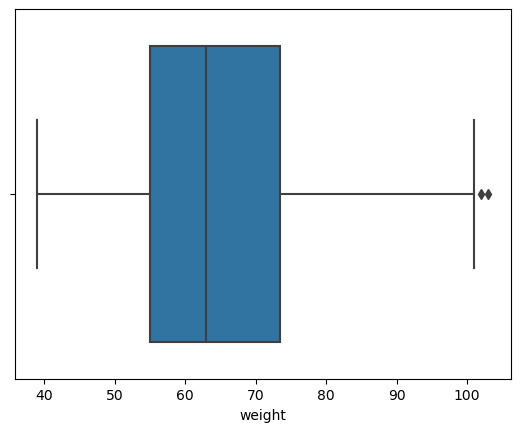

In [11]:
sb.boxplot(df['weight'])

In [12]:
d_gender = pd.get_dummies(df['gender'])
d_gender

,F,M
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
194,0,1
195,0,1
196,0,1
197,0,1


In [13]:
df['weight'].skew()

0.7449402052268245

In [14]:
df['height'].skew()

0.2129090698591845

In [15]:
df1 = df['height']
df1

0      157
1      154
2      157
3      163
4      157
      ... 
194    189
195    183
196    185
197    185
198    180
Name: height, Length: 199, dtype: int64

In [16]:
X = pd.concat((d_gender,df1),axis=1)
X.drop(['F'],axis=1,inplace=True)

In [17]:
Y = df['weight']
Y

0       39
1       43
2       44
3       45
4       45
      ... 
194     97
195    101
196    102
197    103
198     99
Name: weight, Length: 199, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.8,random_state=0)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((159, 2), (40, 2), (159,), (40,))

# LinearRegression :

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)
print(lr.coef_)

[8.70863365 0.750317  ]


In [20]:
print(lr.intercept_)

-66.72168320763846


# Model Testing :

In [21]:
Y_pre = lr.predict(X_test)
Y_pre

array([54.07935446, 75.54337719, 57.08062248, 59.33157349, 80.04527921,
       80.79559622, 55.57998847, 71.79179217, 57.83093948, 79.29496221,
       54.82967147, 76.29369419, 75.54337719, 77.0440112 , 54.82967147,
       54.82967147, 57.08062248, 61.5825245 , 56.33030547, 57.83093948,
       68.79052415, 74.79306018, 68.04020715, 58.58125649, 64.28862212,
       69.54084115, 77.0440112 , 75.54337719, 60.0818905 , 57.08062248,
       44.32523341, 55.57998847, 62.33284151, 61.5825245 , 56.33030547,
       71.79179217, 77.0440112 , 51.07808645, 71.04147516, 85.29749824])

In [22]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [23]:
mse = mean_squared_error(Y_test,Y_pre)
mae = mean_absolute_error(Y_test,Y_pre)
r2_value = r2_score(Y_test,Y_pre)
rmse = (mse)**1/2

print('mean_squared_error is = '+str(mse))
print('mean_absolute_error is = '+str(mae))
print('r2_value is = '+str(r2_value))
print('root_mean_squared_error is = '+str(rmse))

mean_squared_error is = 49.1749585554267
mean_absolute_error is = 5.742367136783505
r2_value is = 0.7089334938047223
root_mean_squared_error is = 24.58747927771335


# Actual VS Predict (Test Data) :

In [24]:
df2 = pd.DataFrame({'Actual Weight' : Y_test,'Predict Weight' : Y_pre})
df2

,Actual Weight,Predict Weight
18,51,54.079354
169,80,75.543377
106,64,57.080622
92,62,59.331573
176,83,80.045279
183,87,80.795596
5,47,55.579988
139,70,71.791792
12,50,57.830939
160,76,79.294962


<AxesSubplot:xlabel='Actual Weight', ylabel='Predict Weight'>

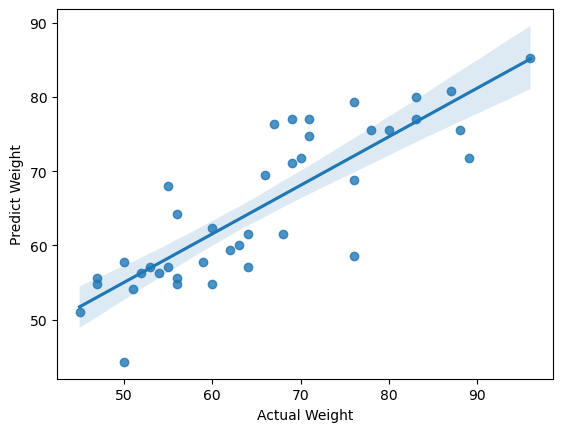

In [25]:
sb.regplot(x='Actual Weight' , y='Predict Weight' , data=df2)

In [26]:
Y_train_pre = lr.predict(X_train)
Y_train_pre

array([71.04147516, 59.33157349, 60.0818905 , 81.54591322, 75.54337719,
       55.57998847, 45.82586742, 51.07808645, 55.57998847, 76.29369419,
       60.0818905 , 80.79559622, 57.08062248, 56.33030547, 68.79052415,
       52.57872045, 57.08062248, 73.29242617, 65.33410952, 60.8322075 ,
       72.54210917, 85.29749824, 79.29496221, 55.57998847, 54.82967147,
       67.28989014, 57.08062248, 79.29496221, 57.08062248, 57.83093948,
       73.29242617, 64.58379252, 75.54337719, 76.29369419, 57.83093948,
       76.29369419, 57.83093948, 53.32903746, 55.57998847, 60.8322075 ,
       60.8322075 , 49.57745244, 83.79686423, 56.33030547, 71.79179217,
       51.07808645, 53.32903746, 78.5446452 , 60.0818905 , 55.57998847,
       54.07935446, 80.04527921, 78.5446452 , 82.29623022, 74.79306018,
       74.79306018, 74.79306018, 57.83093948, 70.29115816, 89.79940027,
       77.7943282 , 53.32903746, 51.07808645, 58.58125649, 62.33284151,
       68.04020715, 54.82967147, 71.79179217, 68.79052415, 57.83

In [27]:
mse1 = mean_squared_error(Y_train,Y_train_pre)
mae1 = mean_absolute_error(Y_train,Y_train_pre)
r2value = r2_score(Y_train,Y_train_pre)
rmse1 = (mse1)**1/2

print('mean_squared_error is = '+str(mse1))
print('mean_absolute_error is = '+str(mae1))
print('r2_value is = '+str(r2value))
print('root_mean_squared_error is = '+str(rmse1)) 

'''High bairs low variance'''      

mean_squared_error is = 60.42042427178182
mean_absolute_error is = 6.0763499522871385
r2_value is = 0.6407202240099643
root_mean_squared_error is = 30.21021213589091


'High bairs low variance'

# Actual vs Predict (Train Data) :

In [28]:
df3 = pd.DataFrame({'Actual Weight' : Y_train , 'Predict Weight' : Y_train_pre})
df3

,Actual Weight,Predict Weight
153,75,71.041475
66,57,59.331573
26,52,60.081890
131,69,81.545913
146,71,75.543377
...,...,...
67,57,58.581256
192,96,80.045279
117,66,71.791792
47,55,56.330305


<AxesSubplot:xlabel='Actual Weight', ylabel='Predict Weight'>

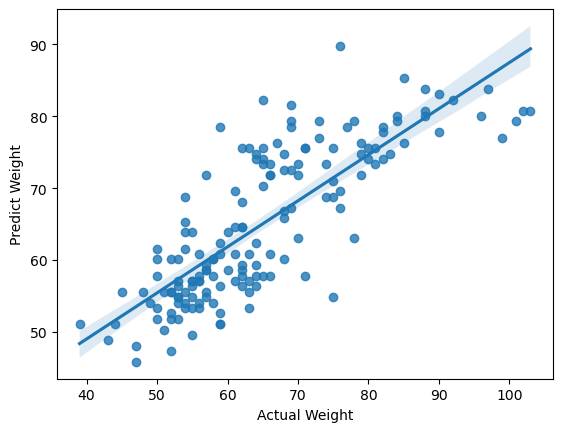

In [29]:
sb.regplot(x='Actual Weight',y='Predict Weight' , data=df3)

# Tested Data Adjusted_R2 Value :

In [30]:
Adjusted_r2=1-(1-r2_value)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
Adjusted_r2

0.6932001691455181

# Ridger Regression (The Accepted Model) :

In [31]:
from sklearn.linear_model import Ridge
rid = Ridge()
rid.fit(X_train,Y_train)
print(rid.intercept_)
print(rid.coef_)

-69.80001938066967
[8.23746192 0.76955291]


In [32]:
y_rid_pre = rid.predict(X_test)
y_rid_pre


array([54.09799911, 75.41786049, 57.17621075, 59.48486948, 80.03517795,
       80.80473086, 55.63710493, 71.57009594, 57.94576366, 79.26562504,
       54.86755202, 76.1874134 , 75.41786049, 76.95696631, 54.86755202,
       54.86755202, 57.17621075, 61.79352821, 56.40665784, 57.94576366,
       68.4918843 , 74.64830758, 67.7223314 , 58.71531657, 63.87456685,
       69.26143721, 76.95696631, 75.41786049, 60.25442239, 57.17621075,
       44.09381128, 55.63710493, 62.56308112, 61.79352821, 56.40665784,
       71.57009594, 76.95696631, 51.01978747, 70.80054303, 85.42204832])

In [33]:
mse2 = mean_squared_error(Y_test,y_rid_pre)
mae2 = mean_absolute_error(Y_test,y_rid_pre)
r2_Value_2 = r2_score(Y_test,y_rid_pre)
rmse2 = (mse2)**1/2
ad_r2=1-(1-r2_Value_2)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

print('mean_squared_error is = '+str(mse2))
print('mean_absolute_error is = '+str(mae2))
print('r2_value is = '+str(r2_Value_2))
print('root_mean_squared_error is = '+str(rmse2))
print('adjusted r2 value is = '+str(ad_r2))

mean_squared_error is = 48.871885551329036
mean_absolute_error is = 5.709428347118906
r2_value is = 0.7107273824630194
root_mean_squared_error is = 24.435942775664518
adjusted r2 value is = 0.6950910247583177


In [34]:
df4 = pd.DataFrame({'Actual Weight' : Y_test , 'Predict Weight' : y_rid_pre})
df4

,Actual Weight,Predict Weight
18,51,54.097999
169,80,75.417860
106,64,57.176211
92,62,59.484869
176,83,80.035178
183,87,80.804731
5,47,55.637105
139,70,71.570096
12,50,57.945764
160,76,79.265625


<AxesSubplot:xlabel='Actual Weight', ylabel='Predict Weight'>

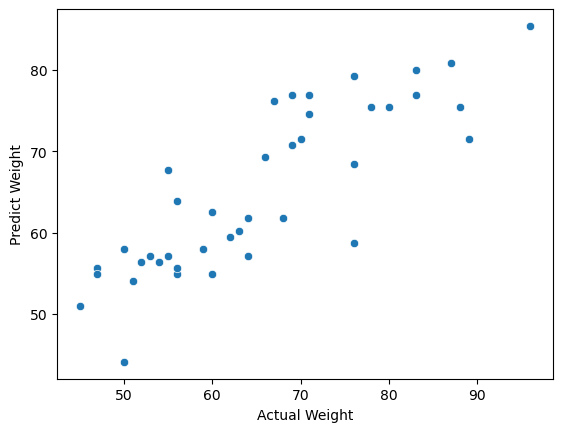

In [35]:
sb.scatterplot(x='Actual Weight',y='Predict Weight' , data=df4)

# Lasso Regression :

In [36]:
from sklearn.linear_model import Lasso
las = Lasso()
las.fit(X_train,Y_train)
print(las.coef_)
print(las.intercept_)

[0.         1.09463309]
-121.70357735750476


In [37]:
Y_las_pre = las.predict(X_test)
Y_las_pre

array([54.53234956, 73.14111202, 58.9108819 , 62.19478116, 79.70891054,
       80.80354363, 56.72161573, 67.66794659, 60.00551499, 78.61427746,
       55.62698264, 74.23574511, 73.14111202, 75.3303782 , 55.62698264,
       55.62698264, 58.9108819 , 65.47868042, 57.81624881, 60.00551499,
       63.28941425, 72.04647894, 62.19478116, 61.10014807, 56.72161573,
       64.38404733, 75.3303782 , 73.14111202, 63.28941425, 58.9108819 ,
       40.30211943, 56.72161573, 66.57331351, 65.47868042, 57.81624881,
       67.66794659, 75.3303782 , 50.15381721, 66.57331351, 87.37134215])

In [38]:
mse3 = mean_squared_error(Y_test,Y_las_pre)
mae3 = mean_absolute_error(Y_test,Y_las_pre)
r2_value_3 = r2_score(Y_test,Y_las_pre)
rmse3 = (mse3)**1/2
ad_r2_3 = 1-(1-r2_value_3)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

print('mean_squared_error is = '+str(mse3))
print('mean_absolute_error is = '+str(mae3))
print('r2_value is = '+str(r2_value_3))
print('root_mean_squared_error is = '+str(rmse3))
print('adjusted r2 value is = '+str(ad_r2_3))

mean_squared_error is = 52.43067039382065
mean_absolute_error is = 5.649138560459172
r2_value is = 0.6896629402990831
root_mean_squared_error is = 26.215335196910324
adjusted r2 value is = 0.6728879640990336


# ElasticNet Regression :

In [39]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet()
enet.fit(X_train,Y_train)
print(enet.coef_)
print(enet.intercept_)

[0.81390281 1.06092656]
-116.30441219815329


In [40]:
y_enet_pre = enet.predict(X_test)
y_enet_pre

array([54.5047642 , 73.35441856, 58.74847044, 61.93125013, 79.71997793,
       80.78090449, 56.62661732, 68.04978575, 59.80939701, 78.65905136,
       55.56569076, 74.41534512, 73.35441856, 75.47627168, 55.56569076,
       55.56569076, 58.74847044, 65.11402981, 57.68754388, 59.80939701,
       63.8060795 , 72.29349199, 62.74515294, 60.87032357, 57.44052013,
       64.86700606, 75.47627168, 73.35441856, 62.99217669, 58.74847044,
       40.7127189 , 56.62661732, 66.17495637, 65.11402981, 57.68754388,
       68.04978575, 75.47627168, 50.26105795, 66.98885919, 87.14646386])

In [41]:
mse4 = mean_squared_error(Y_test,y_enet_pre)
mae4 = mean_absolute_error(Y_test,y_enet_pre)
r2_value_4 = r2_score(Y_test,y_enet_pre)
rmse4 = (mse4)**1/2
ad_r2_4 = 1-(1-r2_value_4)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)


print('mean_squared_error is = '+str(mse4))
print('mean_absolute_error is = '+str(mae4))
print('r2_value is = '+str(r2_value_4))
print('root_mean_squared_error is = '+str(rmse4))
print('adjusted r2 value is = '+str(ad_r2_4))

mean_squared_error is = 51.39469485560585
mean_absolute_error is = 5.585548009561948
r2_value is = 0.6957948779614623
root_mean_squared_error is = 25.697347427802924
adjusted r2 value is = 0.6793513578512711
